# Práctica 6: Regresión Logística.

## Realizado por:
- Susana Suárez Mendoza
- Mara Pareja del Pino

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing, datasets, linear_model, metrics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Ejercicio 1. Regresión Logística vs Perceptrón.

1. Conjunto de datos para el ejercicio 1.

In [2]:
X,y = datasets.make_blobs(n_samples=20,
                          n_features=2,
                          centers=[[-7,-7], [-2,10], [5,2]],
                          cluster_std=0.6,
                          random_state=123)

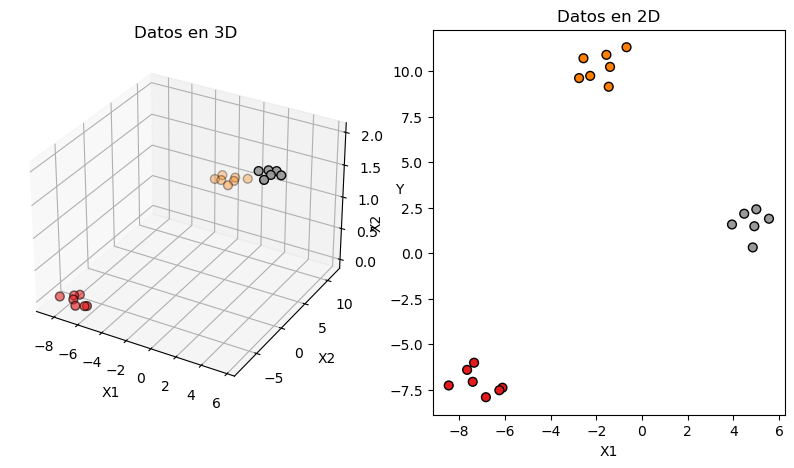

In [3]:

#representación gráfica de los datos en 3D y 2D en dos graficas
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Datos en 3D")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax = fig.add_subplot(122)
ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Datos en 2D")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()


2. Dividir el conjunto de datos.

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=123)

3. Obtener un clasificador lineal con el método Perceptron.

In [5]:
#clasificador lineal Perceptron
clf = linear_model.Perceptron(max_iter=1000, random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Perceptron")
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))


Perceptron
Accuracy score:  1.0


4. Obtener un clasificador lineal mediante regresión Logística.

In [6]:
#clasificador lineal mediante Regresion Logistica
clf_reg = linear_model.LogisticRegression(random_state=123)
clf_reg.fit(X_train, y_train)
y_pred_reg = clf_reg.predict(X_test)
print("Regresion Logistica")
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred_reg))

Regresion Logistica
Accuracy score:  1.0


5. Mostrar en el mismo gráfico  las muestras con las que se entrenó los modelos, las superficies de decisión obtenidas con el Perceptrón (líneas azules) y las superficies de decisión obtenidas mediante Regresión Logística (líneas rojas).

In [16]:
#pesos e intercept perceptron
b = clf.intercept_
w = clf.coef_

#pesos e intercept regresion logistica
b_reg = clf_reg.intercept_
w_reg = clf_reg.coef_


In [17]:
def decision_surface_perc(x):
    x21 = -(w[0,0]/w[0,1])*x -b[0]/w[0,1]
    x22 = -(w[1,0]/w[1,1])*x -b[1]/w[1,1]
    x23 = -(w[2,0]/w[2,1])*x -b[2]/w[2,1]
    return x21, x22, x23

def decision_surface_reg(x):
    x21 = -(w_reg[0,0]/w_reg[0,1])*x -b_reg[0]/w_reg[0,1]
    x22 = -(w_reg[1,0]/w_reg[1,1])*x -b_reg[1]/w_reg[1,1]
    x23 = -(w_reg[2,0]/w_reg[2,1])*x -b_reg[2]/w_reg[2,1]
    return x21, x22, x23

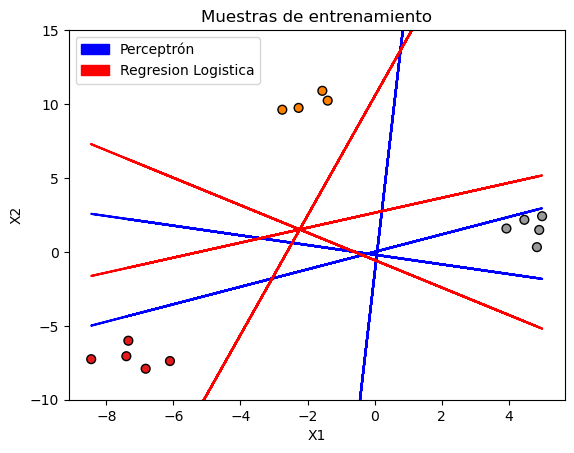

In [19]:
#grafico de muestras de entrenamiento
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title("Muestras de entrenamiento")
plt.xlabel("X1")
plt.ylabel("X2")

#lineas de la frontera de decision perceptron en azul con decision_surface perceptron
x_decision = X_train[:,0]
x21, x22, x23 = decision_surface_perc(x_decision)
plt.plot(x_decision, x21, color='blue')
plt.plot(x_decision, x22, color='blue')
plt.plot(x_decision, x23, color='blue')

#lineas de la frontera de decision regresion logistica en rojo con decision_surface regresion logistica
x21, x22, x23 = decision_surface_reg(x_decision)
plt.plot(x_decision, x21, color='red')
plt.plot(x_decision, x22, color='red')
plt.plot(x_decision, x23, color='red')


#añadir leyenda personalizada
blue_patch = mpatches.Patch(color='blue', label='Perceptrón')
red_patch = mpatches.Patch(color='red', label='Regresion Logistica')
plt.legend(handles=[blue_patch, red_patch], loc = 'upper left')

#escalar el eje y
plt.ylim(-10, 15)
plt.show()




### Ejercicio 2. Implementar un clasificador de sexo basado en la imagen de la cara.

1. Leer el conjunto de entrenamiento y de test de los archivos CelebA-10K-train.csv y CelebA-10K-test.csv respectivamente.

In [21]:
datos_train = pd.read_csv("./datos_num/CelebA-10K-train.csv")
datos_test = pd.read_csv("./datos_num/CelebA-10K-test.csv")

X_train, y_train, X_test, y_test = datos_train.iloc[:,2:], datos_train.iloc[:,1],datos_test.iloc[:,2:], datos_test.iloc[:,1]

2. Entrenar un clasificador lineal biclásico utilizando el método de Regresión Logística.

In [25]:
#entrenar un clasificador lineal biclasico con regresion logistica
clf = linear_model.LogisticRegression(random_state=123)
clf.fit(X_train, y_train)

LogisticRegression(random_state=123)

3. Obtener la tasa de acierto del clasificador en las muestras del conjunto de test.

In [24]:
y_pred = clf.predict(X_test)
print("Regresion Logistica")
print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred))

Regresion Logistica
Accuracy score:  0.9126


4. (Opcional) Clasificar las imágenes que están en el archivo comprimido ImagenesParaClasificar.zip que se encuentra en el github de las prácticas de la asignatura y cuyas características están
en el conjunto de datos de test CelebA-10K-test.csv, indicando cuales de ellas las clasifica incorrectamente el clasificador

In [26]:
y_pred

array(['male', 'female', 'female', ..., 'female', 'female', 'female'],
      dtype=object)

In [31]:
names = datos_test.iloc[:,0]
#dataframe names y y_pred
df = pd.DataFrame({'names': names, 'y_pred': y_pred, 'y_test': y_test})
images = ['000038.jpg', '000047.jpg', '000082.jpg', '000220.jpg', '000595.jpg', '000767.jpg', '001182.jpg', '002185.jpg']
resultados = df[df['names'].isin(images)]
resultados

,names,y_pred,y_test
828,001182.jpg,female,male
1174,000595.jpg,male,female
1725,000038.jpg,male,male
2647,000767.jpg,female,female
3387,000220.jpg,female,male
3397,000082.jpg,male,male
4225,002185.jpg,female,male
4526,000047.jpg,female,female


In [32]:
#tasa de acierto y_pored e y_test resutados
print("Accuracy score: ", metrics.accuracy_score(resultados['y_test'], resultados['y_pred']))

Accuracy score:  0.5


La tasa de acierto el de un 50% por lo que la predicción no es del todo exacta debido probablemente a que los rasgos de las caras eran difíciles de clasificar.